In [1]:
pip install pandas keras numpy matplotlib scikit-learn tensorflow keras-applications seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Input, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3, ResNet50, VGG16, VGG19, DenseNet201
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
zip1 = zipfile.ZipFile('/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/split_data.zip')
list1= zip1.namelist()
with zipfile.ZipFile('/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/split_data.zip',"r") as zip_ref:
    z1=zip_ref.extractall()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [6]:
# import splitfolders
# source_folder = '/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/split_data'


# output_folder = 'split_data'


# splitfolders.ratio(source_folder, output=output_folder, ratio=(0.7, 0.3))

# print("Data splitting completed.")

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    strategy = tf.distribute.OneDeviceStrategy("/device:GPU:0")  # Use the first available GPU (T4 GPU)
else:
    strategy = tf.distribute.OneDeviceStrategy("/device:CPU:0")

In [8]:
# Data preparation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_dir = '/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/split_data/train'
test_dir = '/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/split_data/val'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Shuffle disabled for consistent evaluation
)

Found 521 images belonging to 4 classes.
Found 63 images belonging to 4 classes.


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def InceptionV3Model():
    base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(4, activation='softmax')(x)  # Four classes: Stage 1, Stage 2, Stage 3, No ROP
    model = models.Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    
    r = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=10,
        steps_per_epoch=len(train_generator),
        validation_steps=len(test_generator)
    )
    
    test_loss, test_accuracy = model.evaluate(test_generator)
    train_loss, train_accuracy = model.evaluate(train_generator)
    print(f"InceptionV3 Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"InceptionV3 Test Accuracy: {test_accuracy * 100:.2f}%")

    # Generate predictions
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    actual_labels = test_generator.classes
    conf_matrix = confusion_matrix(actual_labels, predicted_labels)

    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate classification metrics
    print("\nClassification Report:")
    print(classification_report(actual_labels, predicted_labels))

    # Calculate Precision, Recall, F1-Score
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,065,572 (84.17 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10


/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 692ms/step - accuracy: 0.3997 - loss: 1.6842 - val_accuracy: 0.4762 - val_loss: 1.1941
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


2024-11-14 22:01:18.682884: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-11-14 22:01:18.700313: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 655ms/step - accuracy: 0.5518 - loss: 1.0835 - val_accuracy: 0.5238 - val_loss: 1.1475
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10


2024-11-14 22:01:29.907168: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 636ms/step - accuracy: 0.6454 - loss: 0.9078 - val_accuracy: 0.6349 - val_loss: 0.9791
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 707ms/step - accuracy: 0.6863 - loss: 0.7939 - val_accuracy: 0.5873 - val_loss: 0.9436
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10


2024-11-14 22:01:52.828582: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 721ms/step - accuracy: 0.7807 - loss: 0.7106 - val_accuracy: 0.6349 - val_loss: 0.8446
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step - accuracy: 0.7149 - loss: 0.7025
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 571ms/step - accuracy: 0.7875 - loss: 0.5786
InceptionV3 Train Accuracy: 78.31%
InceptionV3 Test Accuracy: 63.49%
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Confusion Matrix:
[[25  0  1  1]
 [ 7  3  1  1]
 [ 8  2  5  1]
 [ 0  0  1  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.93      0.75        27
           1       0.60      0.25      0.35        12
           2       0.62      0.31      0.42        16
           3       0.70      0.88      0.78         8

    accuracy                           0.63        63
   macro avg       0.64      0.59      0.57        63
weighted avg       0.63      0.63      0.59        6

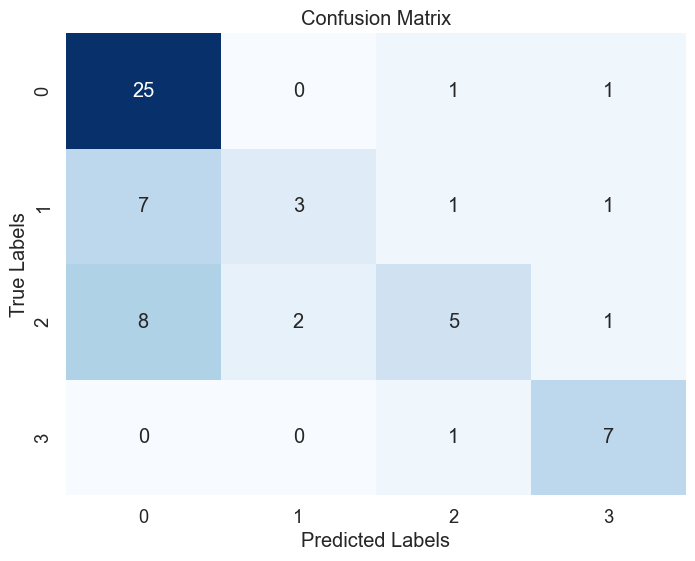

In [10]:
InceptionV3Model()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def ResNet50Model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(4, activation='softmax')(x)  # Four classes: Stage 1, Stage 2, Stage 3, No ROP
    model = models.Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()

    r = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=10,
        steps_per_epoch=len(train_generator),
        validation_steps=len(test_generator)
    )

    test_loss, test_accuracy = model.evaluate(test_generator)
    train_loss, train_accuracy = model.evaluate(train_generator)
    print(f"ResNet50 Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"ResNet50 Test Accuracy: {test_accuracy * 100:.2f}%")

    # Generate predictions
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    actual_labels = test_generator.classes
    conf_matrix = confusion_matrix(actual_labels, predicted_labels)

    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate classification metrics
    print("\nClassification Report:")
    print(classification_report(actual_labels, predicted_labels))

    # Calculate Precision, Recall, F1-Score
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 988ms/step - accuracy: 0.4147 - loss: 1.4691 - val_accuracy: 0.4286 - val_loss: 1.3730
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 898ms/step - accuracy: 0.5140 - loss: 1.2376 - val_accuracy: 0.4286 - val_loss: 1.3792
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 876ms/step - accuracy: 0.5032 - loss: 1.2781 - val_accuracy: 0.4286 - val_loss: 1.3336
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10


2024-11-14 22:03:09.508293: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 904ms/step - accuracy: 0.5103 - loss: 1.2364 - val_accuracy: 0.4286 - val_loss: 1.3477
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 972ms/step - accuracy: 0.5102 - loss: 1.2429 - val_accuracy: 0.4286 - val_loss: 1.3116
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 796ms/step - accuracy: 0.5670 - loss: 1.1448
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 755ms/step - accuracy: 0.5094 - loss: 1.2182
ResNet50 Train Accuracy: 51.63%
ResNet50 Test Accuracy: 42.86%
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Confusion Matrix:
[[27  0  0  0]
 [12  0  0  0]
 [16  0  0  0]
 [ 8  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        27
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        16


/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being s

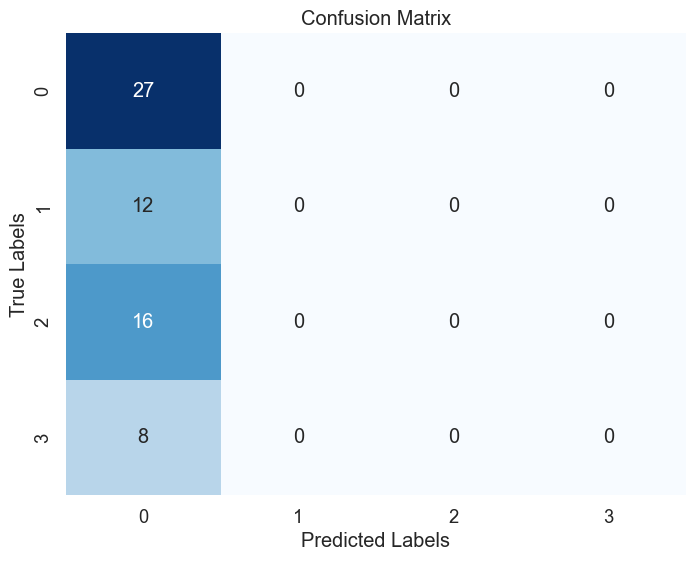

In [12]:
ResNet50Model()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def VGG16Model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(4, activation='softmax')(x)  # Four classes: Stage 1, Stage 2, Stage 3, No ROP
    model = models.Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    
    r = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=10,
        steps_per_epoch=len(train_generator),
        validation_steps=len(test_generator)
    )

    test_loss, test_accuracy = model.evaluate(test_generator)
    train_loss, train_accuracy = model.evaluate(train_generator)
    print(f"VGG16 Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"VGG16 Test Accuracy: {test_accuracy * 100:.2f}%")

    # Generate predictions
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    actual_labels = test_generator.classes
    conf_matrix = confusion_matrix(actual_labels, predicted_labels)

    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate classification metrics
    print("\nClassification Report:")
    print(classification_report(actual_labels, predicted_labels))

    # Calculate Precision, Recall, F1-Score
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [14]:
VGG16Model()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,596 (68.38 MB)

 Trainable params: 3,211,908 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.3759 - loss: 4.5928 - val_accuracy: 0.4603 - val_loss: 1.3814
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.5217 - loss: 1.3710 - val_accuracy: 0.4762 - val_loss: 1.1017
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
 9/17 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5204 - loss: 1.0926

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def VGG19Model():
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(4, activation='softmax')(x)  # Four classes: Stage 1, Stage 2, Stage 3, No ROP
    model = models.Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    
    r = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=10,
        steps_per_epoch=len(train_generator),
        validation_steps=len(test_generator)
    )
    
    test_loss, test_accuracy = model.evaluate(test_generator)
    train_loss, train_accuracy = model.evaluate(train_generator)
    print(f"VGG19 Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"VGG19 Test Accuracy: {test_accuracy * 100:.2f}%")

    # Generate predictions
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    actual_labels = test_generator.classes
    conf_matrix = confusion_matrix(actual_labels, predicted_labels)

    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate classification metrics
    print("\nClassification Report:")
    print(classification_report(actual_labels, predicted_labels))

    # Calculate Precision, Recall, F1-Score
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           51

 Total params: 23,236,292 (88.64 MB)

 Trainable params: 3,211,908 (12.25 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.3446 - loss: 4.3950 - val_accuracy: 0.4762 - val_loss: 1.8930
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-11-13 23:13:57.780675: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.5088 - loss: 1.4266 - val_accuracy: 0.4286 - val_loss: 1.3306
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.5766 - loss: 1.0761 - val_accuracy: 0.5873 - val_loss: 1.0949
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.5698 - loss: 1.0198 - val_accuracy: 0.4762 - val_loss: 1.1917
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.5962 - loss: 1.0232 - val_accuracy: 0.5556 - val_loss: 1.0409
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6725 - loss: 0.8146
17/17 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.5838 - lo

/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being s

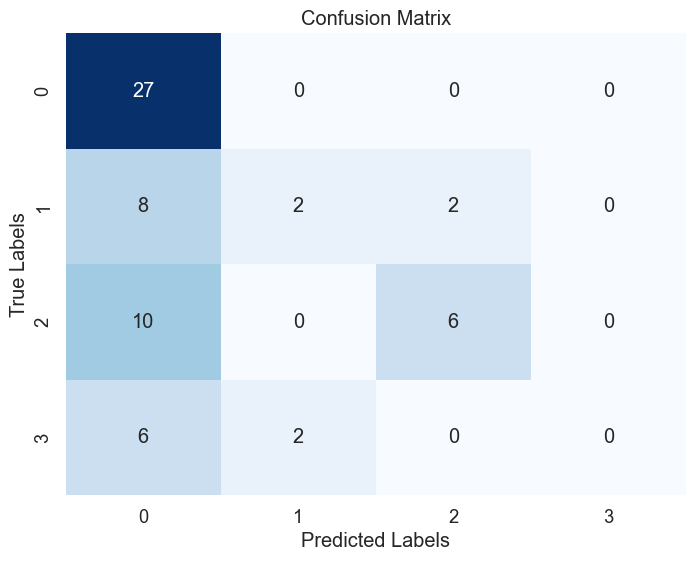

In [ ]:
VGG19Model()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def DenseNet201Model():
    # Load DenseNet201 model with pretrained ImageNet weights
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze the layers to avoid training

    # Add custom layers on top of the base model
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(4, activation='softmax')(x)  # Four classes: Stage 1, Stage 2, Stage 3, No ROP

    # Create the model
    model = models.Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Print the model summary
    model.summary()
    
    # Train the model
    r = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=10,
        steps_per_epoch=len(train_generator),
        validation_steps=len(test_generator)
    )
    
    # Evaluate the model on test and train data
    test_loss, test_accuracy = model.evaluate(test_generator)
    train_loss, train_accuracy = model.evaluate(train_generator)
    print(f"DenseNet201 Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"DenseNet201 Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # Generate predictions on the test set
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    # Get the actual labels
    actual_labels = test_generator.classes

    # Generate confusion matrix
    conf_matrix = confusion_matrix(actual_labels, predicted_labels)

    # Print confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    # Generate a classification report
    print("\nClassification Report:")
    print(classification_report(actual_labels, predicted_labels, target_names=test_generator.class_indices.keys()))

    # Calculate precision, recall, and F1 score
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,568,388 (70.83 MB)

 Trainable params: 246,404 (962.52 KB)

 Non-trainable params: 18,321,984 (69.89 MB)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4341 - loss: 1.3619 - val_accuracy: 0.5079 - val_loss: 1.1308
Epoch 2/10


/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6128 - loss: 0.9381 - val_accuracy: 0.7143 - val_loss: 0.8926
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7196 - loss: 0.7785 - val_accuracy: 0.6984 - val_loss: 0.7676
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7402 - loss: 0.6777 - val_accuracy: 0.6984 - val_loss: 0.7477
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8323 - loss: 0.5477 - val_accuracy: 0.6825 - val_loss: 0.8003
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accurac

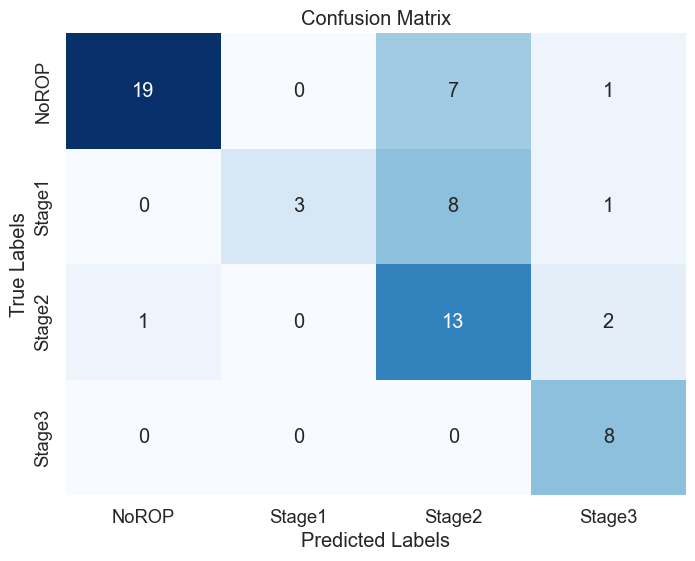

In [ ]:
DenseNet201Model()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def MobileNetModel():
    # Load MobileNet model with pretrained ImageNet weights
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze the layers to avoid training

    # Add custom layers on top of the base model
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(4, activation='softmax')(x)  # Four classes: Stage 1, Stage 2, Stage 3, No ROP

    # Create the model
    model = models.Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Print the model summary
    model.summary()
    
    # Train the model
    r = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=10,
        steps_per_epoch=len(train_generator),
        validation_steps=len(test_generator)
    )
    
    # Evaluate the model on test and train data
    test_loss, test_accuracy = model.evaluate(test_generator)
    train_loss, train_accuracy = model.evaluate(train_generator)
    print(f"MobileNet Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"MobileNet Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # Generate predictions on the test set
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    # Get the actual labels
    actual_labels = test_generator.classes

    # Generate confusion matrix
    conf_matrix = confusion_matrix(actual_labels, predicted_labels)

    # Print confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    # Generate a classification report
    print("\nClassification Report:")
    print(classification_report(actual_labels, predicted_labels, target_names=test_generator.class_indices.keys()))

    # Calculate precision, recall, and F1 score
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,360,580 (12.82 MB)

 Trainable params: 131,716 (514.52 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.4444 - loss: 1.3812 - val_accuracy: 0.5238 - val_loss: 1.0733
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.6669 - loss: 0.8402 - val_accuracy: 0.5556 - val_loss: 0.9329
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.7494 - loss: 0.6155 - val_accuracy: 0.6349 - val_loss: 0.8597
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.8428 - loss: 0.4993 - val_accuracy: 0.6508 - val_loss: 0.8036
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.8282 - loss: 0.4489 - val_accuracy: 0.7302 - val_loss: 0.6483
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7889 - loss: 0.5406
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy

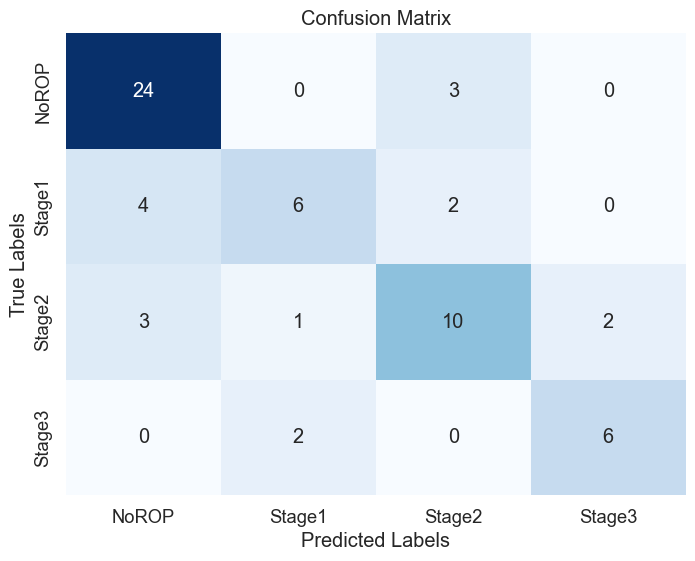

In [ ]:
MobileNetModel()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def AlexNetModel():
    # Define the AlexNet architecture
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation='softmax'))  # Four classes: Stage 1, Stage 2, Stage 3, No ROP

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Print the model summary
    model.summary()

    # Train the model
    r = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=10,
        steps_per_epoch=len(train_generator),
        validation_steps=len(test_generator)
    )

    # Evaluate the model on train and test sets
    test_loss, test_accuracy = model.evaluate(test_generator)
    train_loss, train_accuracy = model.evaluate(train_generator)
    print(f"AlexNet Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"AlexNet Test Accuracy: {test_accuracy * 100:.2f}%")

    # Generate predictions
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    # Get actual labels
    actual_labels = test_generator.classes

    # Generate confusion matrix
    conf_matrix = confusion_matrix(actual_labels, predicted_labels)

    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Generate a classification report
    print("\nClassification Report:")
    print(classification_report(actual_labels, predicted_labels, target_names=test_generator.class_indices.keys()))

    # Calculate precision, recall, and F1 score
    precision = precision_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')

    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1 Score: {f1:.4f}")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_282 (Conv2D)             │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_283 (Conv2D)             │ (None, 22, 22, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_284 (Conv2D)             │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_285 (Conv2D)             │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_286 (Conv2D)             │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,597,572 (82.39 MB)

 Trainable params: 21,597,572 (82.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 417ms/step - accuracy: 0.3679 - loss: 1.5675 - val_accuracy: 0.4286 - val_loss: 1.2892
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/opt/homebrew/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 400ms/step - accuracy: 0.5250 - loss: 1.2212 - val_accuracy: 0.4286 - val_loss: 1.3106
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10


2024-11-13 23:23:06.671920: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 394ms/step - accuracy: 0.5090 - loss: 1.2114 - val_accuracy: 0.4286 - val_loss: 1.3003
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 402ms/step - accuracy: 0.5027 - loss: 1.2217 - val_accuracy: 0.4286 - val_loss: 1.3116
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step - accuracy: 0.5227 - loss: 1.1939 - val_accuracy: 0.4286 - val_loss: 1.3010
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5670 - loss: 1.1623
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.5448 - loss: 1.1692
AlexNet Train Accuracy: 51.63%
AlexNet Test Accuracy: 42.86%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

Confusion Matrix:
[[27  0  0  0]
 [12  0  0  0]
 [16  0  0  0]
 [ 8  0  0  0]]

Classification 

/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being s

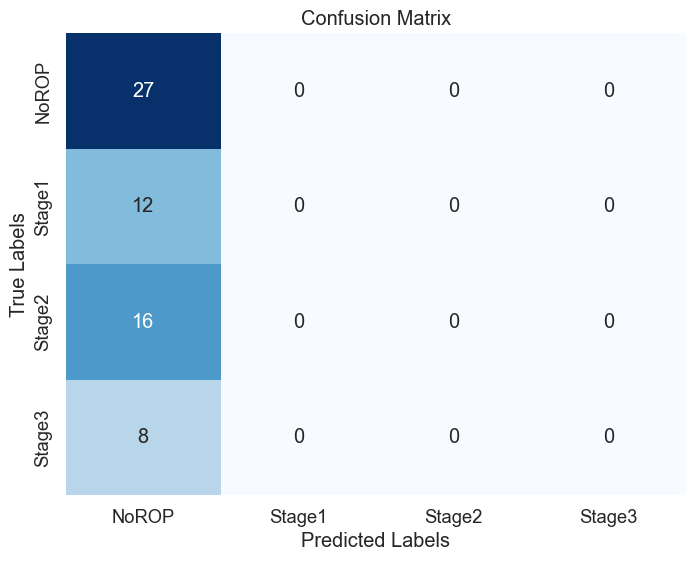

In [ ]:
AlexNetModel()

Epoch 1/10


2024-11-13 23:32:57.622566: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


16/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step - accuracy: 0.3518 - loss: 4.1834

2024-11-13 23:33:28.154926: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3546 - loss: 4.0795 - val_accuracy: 0.4839 - val_loss: 1.5204
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4815 - loss: 1.2471

2024-11-13 23:33:58.440592: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4831 - loss: 1.2465 - val_accuracy: 0.0000e+00 - val_loss: 1.5450
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.5450
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5368 - loss: 1.2277

2024-11-13 23:34:29.239437: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5356 - loss: 1.2292 - val_accuracy: 0.0000e+00 - val_loss: 1.9751
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.9751
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5085 - loss: 1.1993

2024-11-13 23:35:00.553535: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5087 - loss: 1.2000 - val_accuracy: 0.0000e+00 - val_loss: 1.7119
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.7119
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5339 - loss: 1.1326

2024-11-13 23:35:31.720677: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


17/17 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5329 - loss: 1.1333 - val_accuracy: 0.0645 - val_loss: 1.4812
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0645 - val_loss: 1.4812
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5204 - loss: 1.0886

2024-11-13 23:36:03.854771: W tensorflow/core/framework/dataset.cc:993] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5222 - loss: 1.0848 - val_accuracy: 0.0323 - val_loss: 1.6988
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step - accuracy: 0.5775 - loss: 0.9306
Test Accuracy: 44.44%
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step

Confusion Matrix:
[[27  0  0  0]
 [12  0  0  0]
 [15  0  1  0]
 [ 6  2  0  0]]


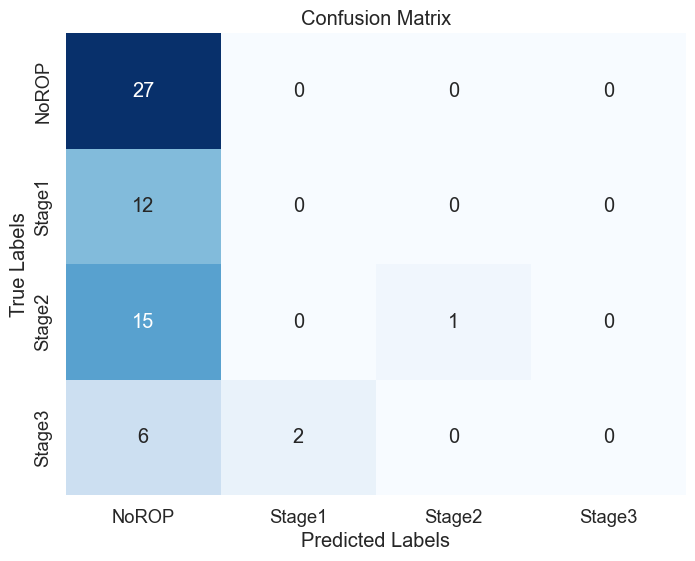


Classification Report:
              precision    recall  f1-score   support

       NoROP       0.45      1.00      0.62        27
      Stage1       0.00      0.00      0.00        12
      Stage2       1.00      0.06      0.12        16
      Stage3       0.00      0.00      0.00         8

    accuracy                           0.44        63
   macro avg       0.36      0.27      0.18        63
weighted avg       0.45      0.44      0.30        63

Weighted Precision: 0.4468
Weighted Recall: 0.4444
Weighted F1 Score: 0.2959


/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mohammadshaad/Desktop/Everything/RESEARCH PAPERS/Early Detection of ROP/ropenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being s

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the CNN model within the strategy scope
with strategy.scope():
    input_shape = (224, 224, 3)
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(4, activation='softmax')(x)  # 4 classes: No_ROP, Stage_1, Stage_2, Stage_3

    model = Model(inputs=inputs, outputs=output)

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the available GPU
with strategy.scope():
    history = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=10,
        steps_per_epoch=len(train_generator),
        validation_steps=len(test_generator)
    )

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get actual labels
actual_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels, target_names=test_generator.class_indices.keys()))

# Calculate precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

Ensemble Accuracy: 0.8043478260869565
Ensemble Confusion Matrix:
[[19  0  0  0]
 [ 2  6  0  1]
 [ 1  1  8  2]
 [ 1  1  0  4]]


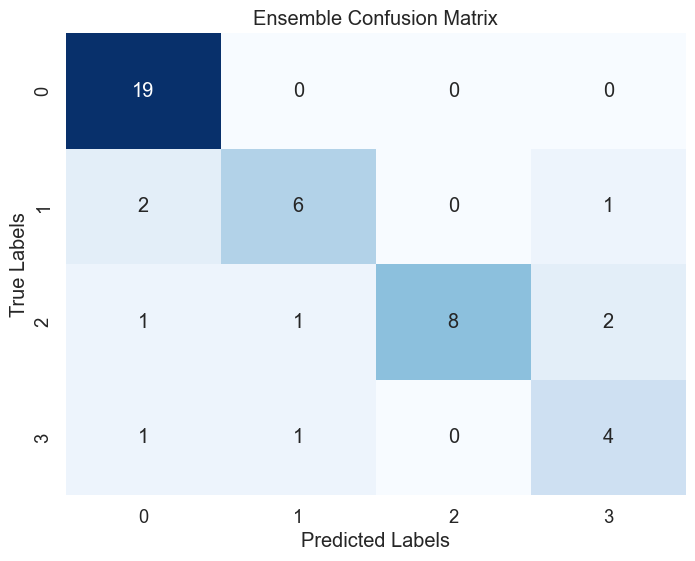

In [ ]:
from tensorflow.keras.applications import InceptionV3, MobileNet
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load and resize images from generators
def load_and_resize_images_from_generator(generator):
    images = []
    labels = []
    for _ in range(len(generator)):
        batch_images, batch_labels = generator.next()
        images.extend(batch_images)
        labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to integers
    return np.array(images), np.array(labels)

# Load images and labels from generators
X_train, y_train = load_and_resize_images_from_generator(train_generator)
X_test, y_test = load_and_resize_images_from_generator(test_generator)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the ensemble classifiers with reduced parameters
rf_clf = RandomForestClassifier(n_estimators=20, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=20, max_depth=5, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

# Train the individual classifiers
rf_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
gb_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
svm_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Combine predictions for soft voting
rf_pred_proba = rf_clf.predict_proba(X_test.reshape(X_test.shape[0], -1))
gb_pred_proba = gb_clf.predict_proba(X_test.reshape(X_test.shape[0], -1))
svm_pred_proba = svm_clf.predict_proba(X_test.reshape(X_test.shape[0], -1))

ensemble_pred_proba = (rf_pred_proba + gb_pred_proba + svm_pred_proba) / 3
ensemble_pred = np.argmax(ensemble_pred_proba, axis=1)

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix for ensemble model
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_pred)

# Print confusion matrix for ensemble model
print("Ensemble Confusion Matrix:")
print(ensemble_conf_matrix)

# Plot confusion matrix for ensemble model
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Ensemble Confusion Matrix')
plt.show()


Ensemble Accuracy: 0.8478260869565217
Ensemble Confusion Matrix:
[[19  0  0  0]
 [ 2  7  0  0]
 [ 1  1  8  2]
 [ 0  1  0  5]]


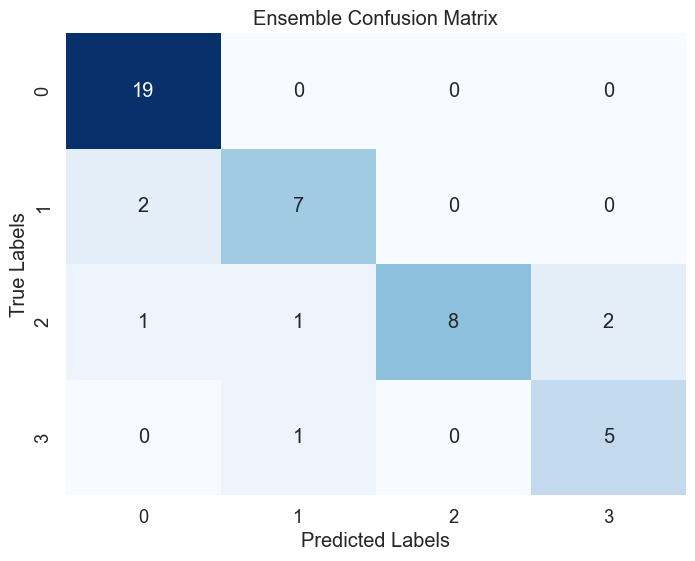

In [ ]:
from tensorflow.keras.applications import InceptionV3, MobileNet
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load and resize images from generators
def load_and_resize_images_from_generator(generator):
    images = []
    labels = []
    for _ in range(len(generator)):
        batch_images, batch_labels = generator.next()
        images.extend(batch_images)
        labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to integers
    return np.array(images), np.array(labels)

# Load images and labels from generators
X_train, y_train = load_and_resize_images_from_generator(train_generator)
X_test, y_test = load_and_resize_images_from_generator(test_generator)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the ensemble classifiers with reduced parameters
rf_clf = RandomForestClassifier(n_estimators=20, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=20, max_depth=5, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

# Train the individual classifiers
rf_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
gb_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
svm_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Combine predictions for soft voting
rf_pred_proba = rf_clf.predict_proba(X_test.reshape(X_test.shape[0], -1))
gb_pred_proba = gb_clf.predict_proba(X_test.reshape(X_test.shape[0], -1))
svm_pred_proba = svm_clf.predict_proba(X_test.reshape(X_test.shape[0], -1))

ensemble_pred_proba = (rf_pred_proba + gb_pred_proba + svm_pred_proba) / 3
ensemble_pred = np.argmax(ensemble_pred_proba, axis=1)

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix for ensemble model
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_pred)

# Print confusion matrix for ensemble model
print("Ensemble Confusion Matrix:")
print(ensemble_conf_matrix)

# Plot confusion matrix for ensemble model
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Ensemble Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.applications import InceptionV3, MobileNet
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and resize images from generators
def load_and_resize_images_from_generator(generator):
    images = []
    labels = []
    
    # Iterate over the generator using a for loop
    for batch_images, batch_labels in generator:
        images.extend(batch_images)
        labels.extend(np.argmax(batch_labels, axis=1))  # Convert one-hot encoded labels to integers
    
    return np.array(images), np.array(labels)

# Load images and labels from generators
X_train, y_train = load_and_resize_images_from_generator(train_generator)
X_test, y_test = load_and_resize_images_from_generator(test_generator)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the ensemble classifiers with reduced parameters
rf_clf = RandomForestClassifier(n_estimators=20, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=20, max_depth=5, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

# Train the individual classifiers
rf_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
gb_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)
svm_clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Combine predictions for soft voting
rf_pred_proba = rf_clf.predict_proba(X_test.reshape(X_test.shape[0], -1))
gb_pred_proba = gb_clf.predict_proba(X_test.reshape(X_test.shape[0], -1))
svm_pred_proba = svm_clf.predict_proba(X_test.reshape(X_test.shape[0], -1))

ensemble_pred_proba = (rf_pred_proba + gb_pred_proba + svm_pred_proba) / 3
ensemble_pred = np.argmax(ensemble_pred_proba, axis=1)

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Accuracy: {ensemble_accuracy * 100:.2f}%")

# Generate confusion matrix for ensemble model
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_pred)

# Print confusion matrix
print("\nEnsemble Confusion Matrix:")
print(ensemble_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Ensemble Confusion Matrix')
plt.show()

# Generate a classification report
print("\nEnsemble Classification Report:")
print(classification_report(y_test, ensemble_pred, target_names=test_generator.class_indices.keys()))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, ensemble_pred, average='weighted')
recall = recall_score(y_test, ensemble_pred, average='weighted')
f1 = f1_score(y_test, ensemble_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

: 